# Clark Whitehead
# ICS-434
# Spring 2022
# Prof. Mahdi

### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [61]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import pandas as pd
from scipy import stats

In [24]:
# Write your code here 
data = {
    "a": np.random.normal(20, 4, 15),
    "b": np.random.normal(20, 4, 15)
}

df = pd.DataFrame(data)

df.head()

,a,b
0,24.578014,21.672332
1,16.602597,22.364361
2,15.790830,19.369886
3,24.708853,21.453570
4,15.070045,21.787151


### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [25]:
print(df["a"].mean())
print()
print(df["b"].mean())

20.800154558127993

20.063125145361884


# No. From the means alone I cannot assume a significant difference between the two samples.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

/home/clark/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

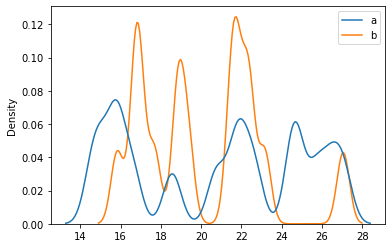

In [33]:
# Write your code here 

sns.kdeplot(data = df, bw=.1)

/home/clark/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

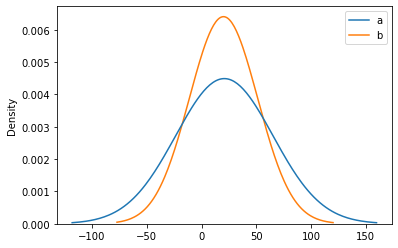

In [35]:
sns.kdeplot(data = df, bw=10)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

# The means look the same, but the standard deviation looks larger for a than b.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [54]:
# Write your code here 
all_data = np.concatenate([df["a"],df["b"]])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:15]
    b_subset = all_data[15:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))

In [66]:
p = stats.ttest_ind(df["a"], df["b"]).pvalue

print("P value for a, b = {}".format(p))

P value for a, b = 0.6013369094704197


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

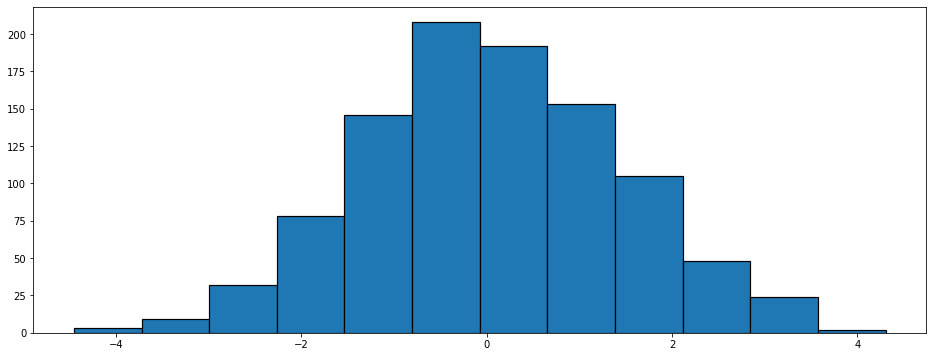

In [60]:
# Write your code here 
plt.figure(figsize=(16,6))
plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.show()